# Semana 6

Usei a seguinte base de dados: [Diabetes prediction dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset). Pode ser usada para prever a diabetes em pacientes baseando-se no histórico médico e em informações demográficas.

In [ ]:
# importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dados = pd.read_csv('semana_6/14-alg-de classificação-supervisionados/diabetes_prediction_dataset.csv', sep=',')
dados.head(5)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [153]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [154]:
dados['diabetes'].unique()

array([0, 1])

In [155]:
# Verificando se há valores NaN
# Para issp, vou imprimir a soma de todos os valores NaN de cada coluna da tabela
dados.isna().sum()
# Não tem nenhum (ainda bem!)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [156]:
# Descrição dos dados
dados.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Gráficos

In [157]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Não coloquei a parte de salvar figuras porque não quero salvá-las kkkkk.

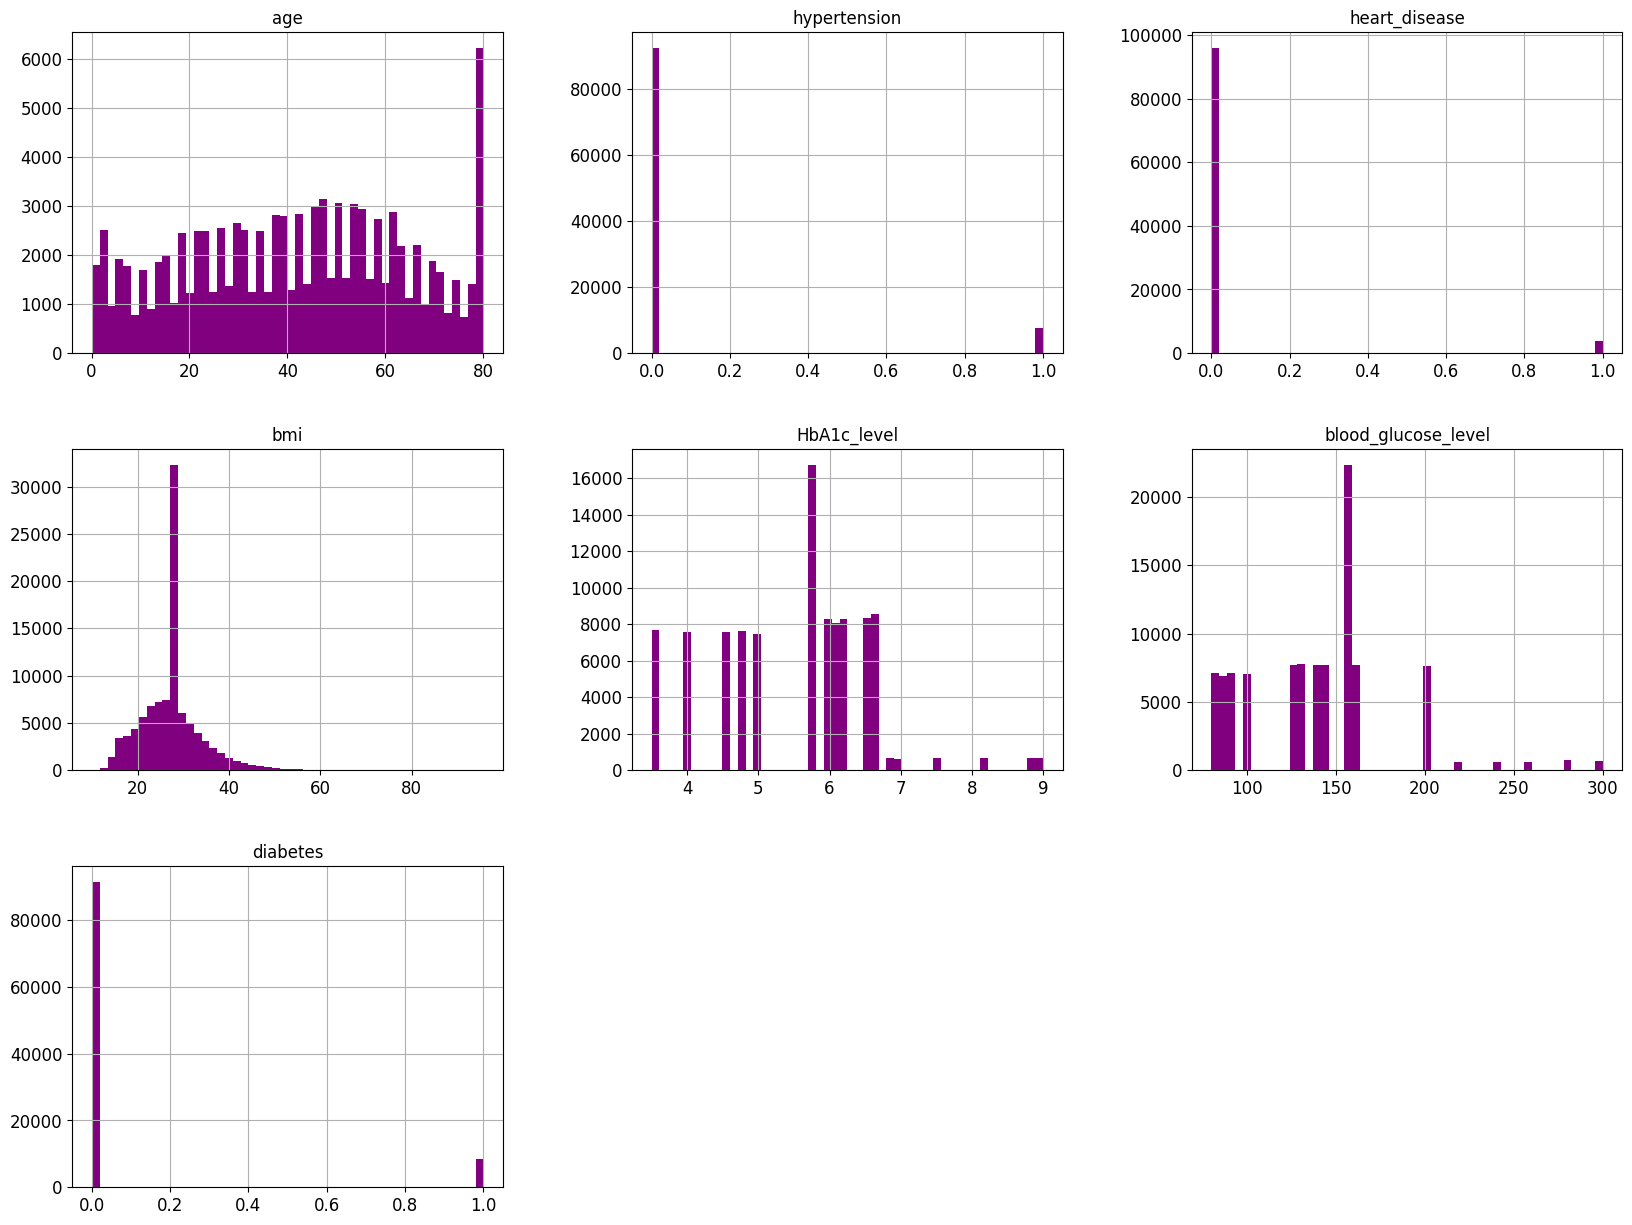

In [158]:
# Histogramas

import matplotlib.pyplot as plt
dados.hist(bins=50, figsize=(20,15), color='purple')
plt.show()

Analisando as colunas gender e smoking_history

In [159]:
dados['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

Decidi apagar as linhas que tem 'No Info' na coluna 'smoking_history'.

In [160]:
dados = dados.loc[dados["smoking_history"] != "No Info"]


In [161]:
dados['smoking_history'].unique()

array(['never', 'current', 'former', 'ever', 'not current'], dtype=object)

Decidi usar o método de One-Hot Encoding para transformar os valores categóricos de smoking_history e gender


In [162]:
# Usando get_dummies, de pandas
dados = pd.get_dummies(dados, columns=["smoking_history"], dtype=int)
# a coluna smoking_history desaparece e outras 5 surgem com valores 0 ou 1, dependendo da ocorrência
dados = pd.get_dummies(dados, columns=["gender"], dtype=int) # o mesmo para gender
dados.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0,0,1,0
5,20.0,0,0,27.32,6.6,85,0,0,0,0,1,0,1,0,0


### Create a Test Set

In [163]:
import numpy as np
from sklearn.model_selection import train_test_split

# separando variaveis
X = dados.drop('diabetes', axis=1)
y = dados['diabetes']

# dividindo dados em conjunto de teste e de treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Select and Train a Model

In [164]:
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelos = {
    'Logistic Regression': LogisticRegression(max_iter=100),  
    'Decision Tree': DecisionTreeClassifier(),                 
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),                                             
    'Neural Network': MLPClassifier(max_iter=200),             
    'k-NN': KNeighborsClassifier(n_neighbors=5)              
}


In [165]:
metricas = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}


resultados = {}

# Loop pelos modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # guardando valores no dicionario
    metricas['Accuracy'].append(acc)
    metricas['Precision'].append(prec)
    metricas['Recall'].append(rec)
    metricas['F1-Score'].append(f1)
    
    resultados[nome] = acc


/home/vitoria/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/tmp/ipykernel_316655/112567995.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(modelos.keys(), rotation=45, ha='right')  # gira os rótulos
/tmp/ipykernel_316655/112567995.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(modelos.keys(), rotation=45, ha='right')  # gira os rótulos
/tmp/ipykernel_316655/112567995.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(modelos.keys(), rotation=45, ha='right')  # gira os rótulos
/tmp/ipykernel_316655/112567995.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(modelos.keys(), rotation=45, ha='right')  # gira os rótulos


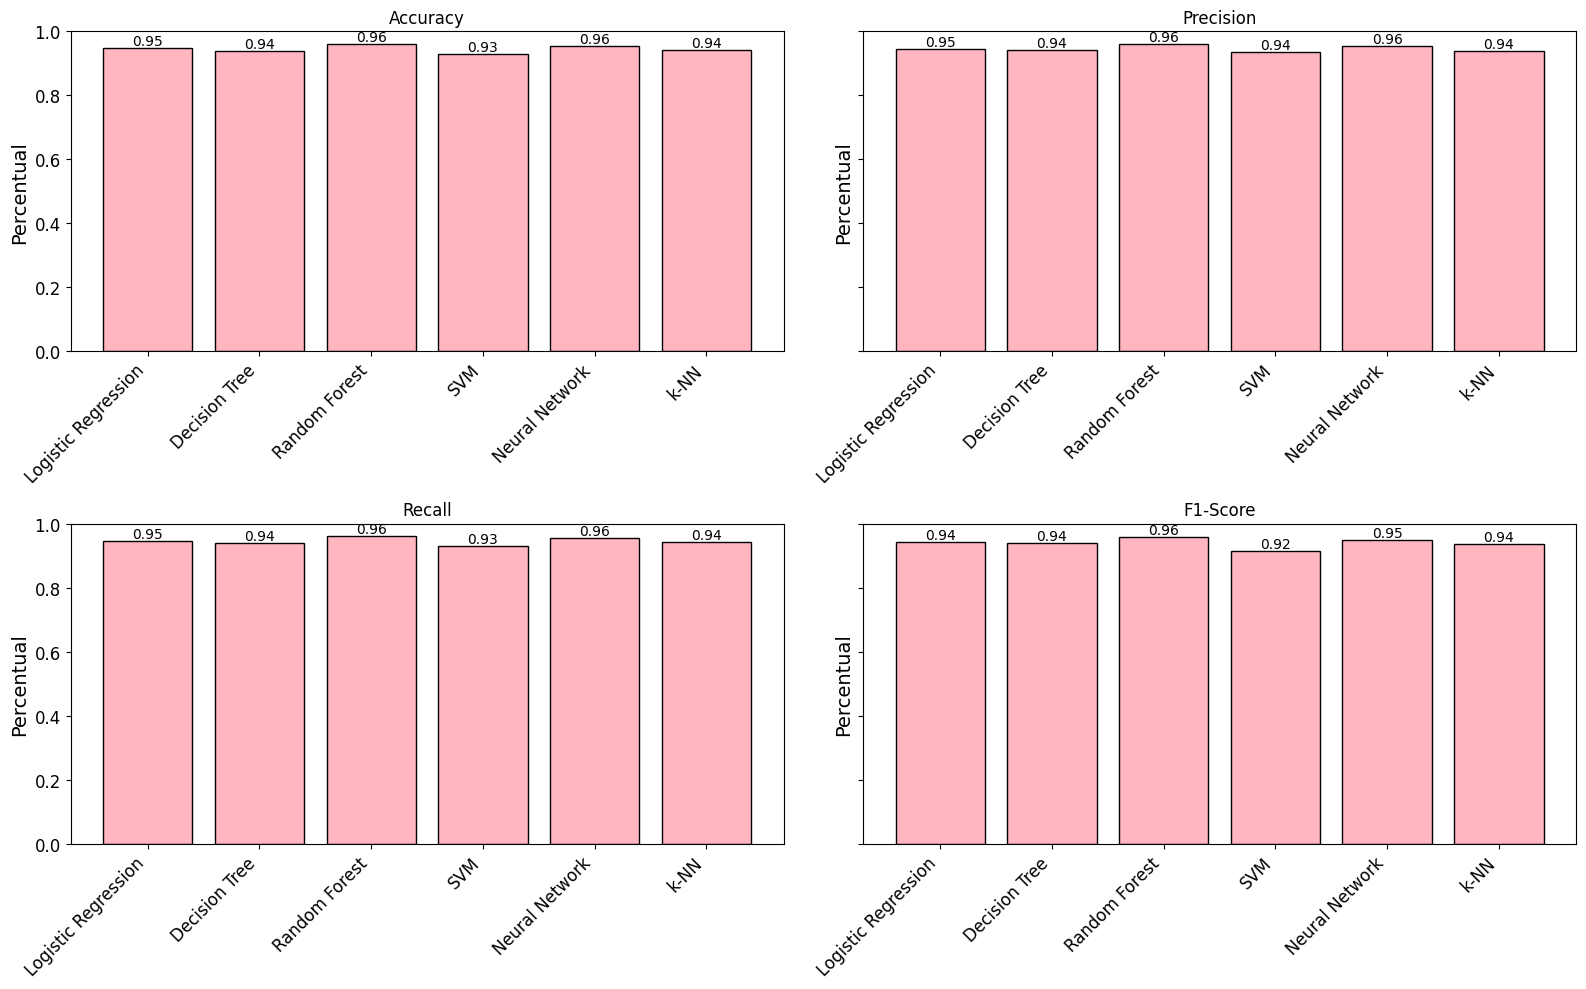

In [166]:
# graficos das matricas separados

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
for i, (metrica, valores) in enumerate(metricas.items()):
    ax = axes[i // 2, i % 2]
    bars = ax.bar(modelos.keys(), valores, color='lightpink', edgecolor='black')
    ax.bar_label(bars, fmt="%.2f")
    ax.set_title(metrica)
    ax.set_ylabel('Percentual')
    ax.set_ylim(0, 1)
    ax.set_xticklabels(modelos.keys(), rotation=45, ha='right')  # gira os rótulos
plt.tight_layout()
plt.show()


In [167]:
resultados_ordenados = sorted(resultados.items(), key=lambda x: x[1], reverse=True)
print("Ranking de acurácia:")
for nome, acuracia in resultados_ordenados:
    print(f"{nome}: {acuracia:.2f}")

melhor_modelo = resultados_ordenados[0][0]
melhor_score = resultados_ordenados[0][1]
print(f"\nMelhor modelo: {melhor_modelo} com acurácia de {melhor_score:.2f}")

Ranking de acurácia:
Random Forest: 0.96
Neural Network: 0.96
Logistic Regression: 0.95
k-NN: 0.94
Decision Tree: 0.94
SVM: 0.93

Melhor modelo: Random Forest com acurácia de 0.96
